**libraries:**

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import mean_squared_error, max_error
from sklearn.model_selection import learning_curve
import tensorflow
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

**Raw Data Visualization and Data Preprocessing**

In [ ]:
df = pd.read_csv("/content/Single_EDFA_Dataset.csv")

In [ ]:
print(df.isnull().sum().sum())

0


There are no null-values in the dataset.

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16497 entries, 0 to 16496
Columns: 171 entries, profileId to outat156683
dtypes: float64(170), int64(1)
memory usage: 21.5 MB


,profileId,measuredTotalPin,measuredTotalPout,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,...,outat156260,outat156307,outat156354,outat156401,outat156448,outat156495,outat156542,outat156589,outat156636,outat156683
count,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,...,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000,16497.000000
mean,10072.219858,-2.406354,14.995927,-23.070990,-22.560116,-22.939042,-22.632351,-22.538749,-22.784246,-22.715920,...,-2.508402,-2.674729,-2.788941,-2.977837,-3.114206,-3.179204,-3.257982,-3.463035,-3.504718,-4.629408
std,5678.698035,2.684093,0.032633,4.044395,3.971898,4.066285,4.159066,4.121255,4.284177,4.248321,...,1.783191,1.920631,2.067847,2.265204,2.366063,2.478067,2.569034,2.608171,2.556375,2.405698
min,2.000000,-7.100000,14.900000,-41.275000,-39.945000,-41.517000,-42.457000,-42.337000,-45.784000,-42.834000,...,-11.509000,-11.167000,-11.779000,-12.299000,-13.529000,-13.098000,-14.708000,-14.448000,-15.176000,-15.947000
25%,5273.000000,-4.700000,15.000000,-25.595000,-24.914000,-25.638000,-25.411000,-25.205000,-25.378000,-25.328000,...,-3.244000,-3.531000,-3.739000,-4.033000,-4.279000,-4.438000,-4.614000,-4.840000,-4.734000,-5.607000
50%,10093.000000,-2.600000,15.000000,-22.919000,-22.458000,-22.772000,-22.342000,-22.197000,-22.383000,-22.324000,...,-2.276000,-2.444000,-2.596000,-2.788000,-2.967000,-3.055000,-3.097000,-3.189000,-3.089000,-4.246000
75%,14727.000000,-0.046481,15.000000,-20.329000,-19.521000,-19.820000,-19.568000,-19.534000,-19.602000,-19.529000,...,-1.398000,-1.486000,-1.526000,-1.622000,-1.718000,-1.683000,-1.606000,-1.683000,-1.780000,-3.206000
max,19962.000000,2.300000,15.100000,-11.064000,-11.025000,-11.594000,-11.844000,-11.884000,-12.151000,-11.830000,...,2.284000,2.724000,2.832000,2.981000,3.067000,3.111000,2.991000,2.711000,2.626000,2.066000


As we can see from the summary of the dataset , the Total Power in output stays solid at 15 dBm. Also is known from the project indications that the total power in ouput is fixed to 15 dBm, so all the column can be modified to be 15 dBm neglecting the little fluctuations that go from 14.9 to 15.1 dBm (or from 30.9 mWto 32.3 mW, so a maximum fluctuations of 0.677 mW).


In [ ]:
df.head(18)

,profileId,measuredTotalPin,measuredTotalPout,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,...,outat156260,outat156307,outat156354,outat156401,outat156448,outat156495,outat156542,outat156589,outat156636,outat156683
0,1002,1.700000,15.0,-20.262,-19.152,-19.402,-18.902,-19.052,-19.192,-19.172,...,-0.876,-0.896,-0.916,-0.936,-0.966,-0.846,-0.826,-1.136,-1.446,-2.486
1,1002,0.900000,15.0,-20.798,-19.688,-20.338,-19.888,-19.898,-19.918,-19.868,...,-1.062,-1.142,-1.082,-1.142,-1.192,-1.162,-1.052,-1.212,-1.502,-2.752
2,1002,-0.046481,15.0,-21.227,-20.627,-21.417,-20.827,-20.847,-20.797,-20.807,...,-1.285,-1.275,-1.295,-1.375,-1.455,-1.385,-1.265,-1.365,-1.515,-2.945
3,1002,-1.500000,15.0,-23.007,-22.307,-22.907,-22.247,-22.187,-22.367,-22.217,...,-1.599,-1.589,-1.619,-1.759,-1.849,-1.819,-1.749,-1.849,-1.799,-3.219
4,1002,-2.600000,15.0,-24.132,-23.302,-23.952,-23.342,-23.122,-23.532,-23.632,...,-1.692,-1.842,-1.812,-1.982,-2.152,-2.142,-2.052,-2.052,-2.072,-3.272
5,1002,-3.500000,15.0,-25.092,-24.212,-24.732,-24.542,-24.622,-24.582,-24.382,...,-1.883,-2.073,-2.193,-2.313,-2.463,-2.493,-2.433,-2.443,-2.353,-3.433
6,1002,-4.500000,15.0,-26.080,-25.090,-26.150,-25.560,-25.410,-25.550,-25.580,...,-2.104,-2.304,-2.364,-2.654,-2.794,-2.764,-2.674,-2.664,-2.464,-3.644
7,1002,-5.600000,15.0,-26.812,-26.222,-27.012,-26.592,-26.492,-26.922,-26.952,...,-2.103,-2.333,-2.523,-2.733,-2.993,-3.073,-2.943,-2.843,-2.623,-3.673
8,1002,-6.600000,15.0,-28.153,-27.463,-27.823,-27.483,-27.543,-27.843,-28.023,...,-2.146,-2.436,-2.626,-2.906,-3.166,-3.276,-3.236,-3.156,-2.836,-3.766
9,10030,1.900000,15.0,-24.745,-23.895,-24.565,-24.085,-24.015,-24.265,-24.035,...,-1.122,-1.252,-1.442,-1.682,-1.922,-1.942,-1.872,-2.092,-2.512,-3.932


In [ ]:
df['profileId'].value_counts()

profileId
1002     9
4285     9
4273     9
4257     9
4245     9
        ..
15834    9
15810    9
15788    9
15785    9
9998     9
Name: count, Length: 1833, dtype: int64

we have 1883 profile ID and we get 9 sample from each cahnnel ID

In [ ]:
df.columns

Index(['profileId', 'measuredTotalPin', 'measuredTotalPout', 'inat152782',
       'inat152829', 'inat152876', 'inat152923', 'inat152970', 'inat153017',
       'inat153064',
       ...
       'outat156260', 'outat156307', 'outat156354', 'outat156401',
       'outat156448', 'outat156495', 'outat156542', 'outat156589',
       'outat156636', 'outat156683'],
      dtype='object', length=171)

we have 171 columns: we have 84 different channels and each one has input power and output power; the first three columns are the ones with the values of the profile ID , measure total input power and measured total output power for every entry.

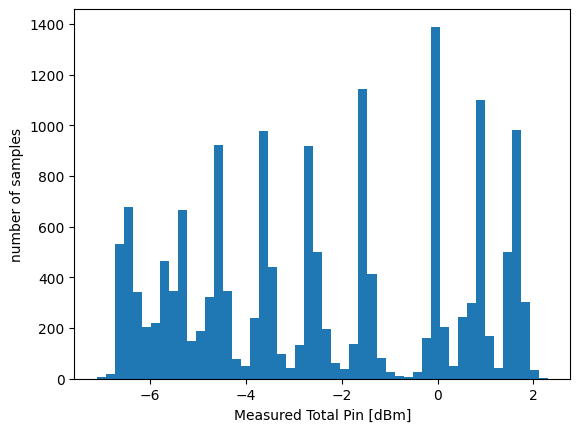

In [ ]:
#Histogram of the total power in input

plt.hist(df['measuredTotalPin'], bins=50)
plt.xlabel('Measured Total Pin [dBm]')
plt.ylabel('number of samples')
plt.show()

The histogram representing the number of samples for each value of the total measured power in input shows that there are some peaks around certains values of power, but the number of samples with the values right before and after have a rapid decrease. The total input power distributes along the range that goes from -7.1 dBm to 2.3 dBm (the minimum and maximum values).

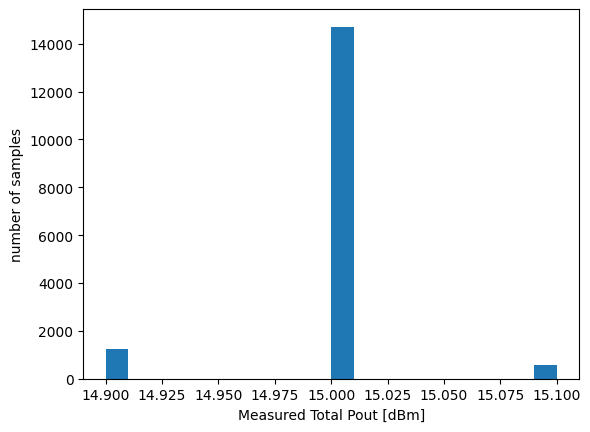

In [ ]:
#Histogram of the total power in output

plt.hist(df['measuredTotalPout'], bins=20)
plt.xlabel('Measured Total Pout [dBm]')
plt.ylabel('number of samples')
plt.show()

The Histogram for the Total measured power in output confirms that the main value for all the profiles is 15 dBm except for neglibile exceptions, so we set the value to 15 dBm .


In [ ]:
df = df.groupby('profileId').mean().reset_index()
df['measuredTotalPout'] = 15
df.head()

,profileId,measuredTotalPin,measuredTotalPout,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,...,outat156260,outat156307,outat156354,outat156401,outat156448,outat156495,outat156542,outat156589,outat156636,outat156683
0,2,-2.382942,15,-22.623667,-21.869222,-22.395889,-21.973667,-21.842556,-22.090333,-22.002556,...,-2.161222,-2.335667,-2.492333,-2.732333,-2.900111,-2.994556,-3.062333,-3.157889,-3.067889,-3.796778
1,12,-2.488889,15,-18.899667,-18.327444,-18.788556,-18.273000,-18.388556,-18.515222,-18.568556,...,-4.053111,-4.287556,-4.398667,-4.684222,-4.814222,-4.923111,-5.083111,-5.395333,-5.487556,-7.443111
2,17,-2.405165,15,-22.336667,-21.664444,-22.257778,-21.708889,-21.723333,-21.876667,-21.856667,...,-2.489444,-2.680556,-2.859444,-3.107222,-3.312778,-3.445000,-3.583889,-3.767222,-3.666111,-4.412778
3,20,-2.566667,15,-22.484222,-21.813111,-22.383111,-21.766444,-21.744222,-21.798667,-21.784222,...,-1.532222,-1.681111,-1.786667,-1.950000,-2.123333,-2.164444,-2.132222,-2.205556,-2.166667,-3.554444
4,24,-2.449609,15,-24.583889,-24.216111,-24.555000,-24.117222,-24.230556,-24.323889,-24.397222,...,-1.337444,-1.441889,-1.476333,-1.534111,-1.608556,-1.486333,-1.340778,-1.400778,-1.464111,-2.945222


After we see that the total input value and total output value does not change or influence that much so they dont help the model, we delete them.

In [ ]:
df.drop(['measuredTotalPin', 'measuredTotalPout'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Columns: 169 entries, profileId to outat156683
dtypes: float64(168), int64(1)
memory usage: 2.4 MB


In [ ]:
x = df.columns[3:87]
x_data = []
for col in x:
  col=col.split('at')
  col=str(float(col[1])/100)
  x_data.append(col)
adjusted_wavelengths = x_data

In [ ]:
df.head()

,profileId,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,inat153111,inat153158,...,outat156260,outat156307,outat156354,outat156401,outat156448,outat156495,outat156542,outat156589,outat156636,outat156683
0,2,-22.623667,-21.869222,-22.395889,-21.973667,-21.842556,-22.090333,-22.002556,-22.082556,-22.059222,...,-2.161222,-2.335667,-2.492333,-2.732333,-2.900111,-2.994556,-3.062333,-3.157889,-3.067889,-3.796778
1,12,-18.899667,-18.327444,-18.788556,-18.273000,-18.388556,-18.515222,-18.568556,-18.613000,-18.860778,...,-4.053111,-4.287556,-4.398667,-4.684222,-4.814222,-4.923111,-5.083111,-5.395333,-5.487556,-7.443111
2,17,-22.336667,-21.664444,-22.257778,-21.708889,-21.723333,-21.876667,-21.856667,-21.881111,-21.965556,...,-2.489444,-2.680556,-2.859444,-3.107222,-3.312778,-3.445000,-3.583889,-3.767222,-3.666111,-4.412778
3,20,-22.484222,-21.813111,-22.383111,-21.766444,-21.744222,-21.798667,-21.784222,-21.807556,-21.910889,...,-1.532222,-1.681111,-1.786667,-1.950000,-2.123333,-2.164444,-2.132222,-2.205556,-2.166667,-3.554444
4,24,-24.583889,-24.216111,-24.555000,-24.117222,-24.230556,-24.323889,-24.397222,-24.371667,-24.382778,...,-1.337444,-1.441889,-1.476333,-1.534111,-1.608556,-1.486333,-1.340778,-1.400778,-1.464111,-2.945222


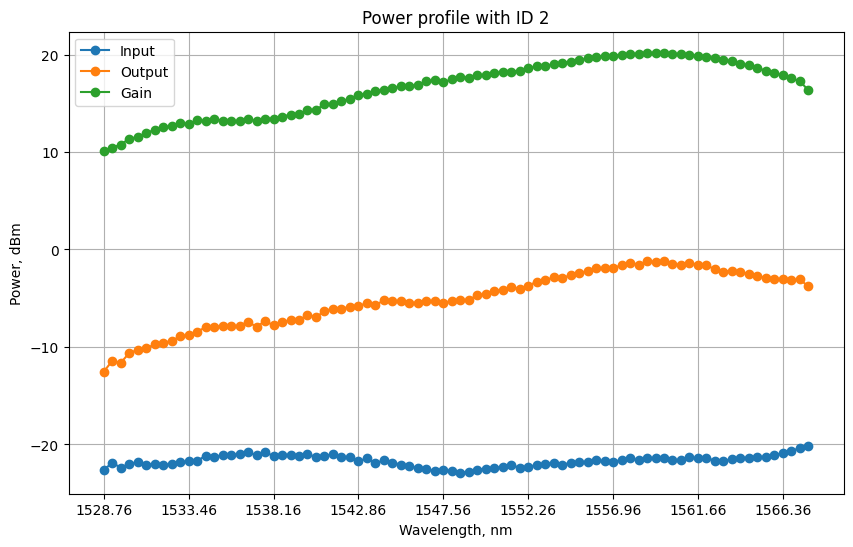

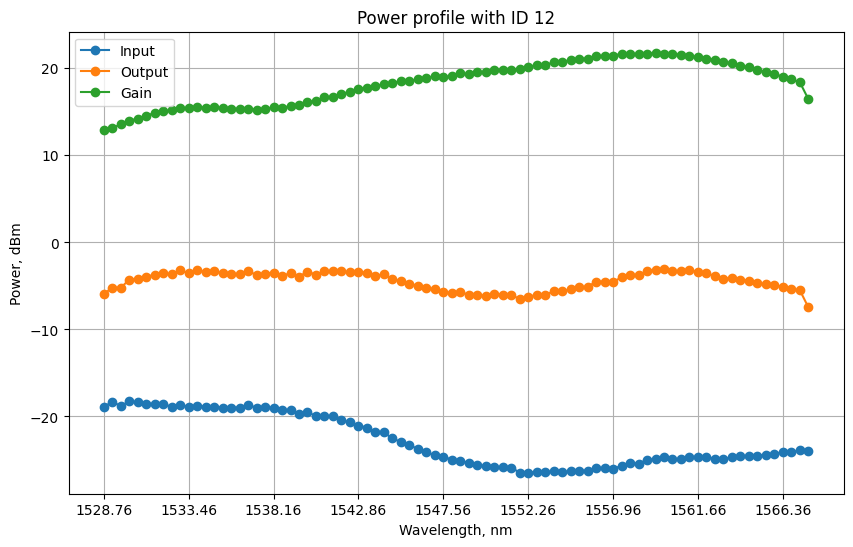

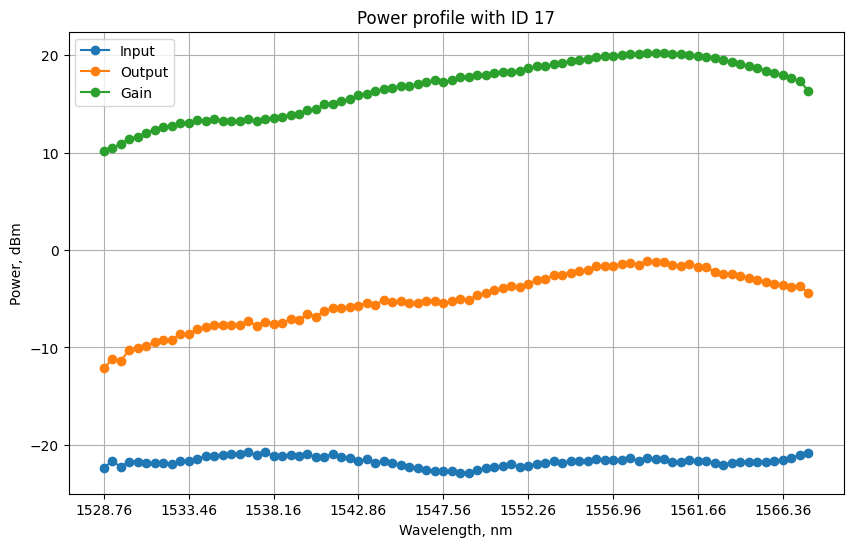

In [ ]:
gains=[]

#plot of the first sample for every profile ID
for i in range(0,3):
    input_powers = df.iloc[i,1:85].values
    output_powers = df.iloc[i,85:169].values
    ID = df.iloc[i,0]
    gain = output_powers - input_powers
    gains.append(gain)
    plt.figure(figsize=(10, 6))
    plt.plot(adjusted_wavelengths, input_powers, label='Input', marker='o')
    plt.plot(adjusted_wavelengths, output_powers, label='Output', marker='o')
    plt.plot(adjusted_wavelengths, gain, label='Gain', marker='o')
    plt.xlabel('Wavelength, nm')
    plt.ylabel('Power, dBm')
    plt.title(f'Power profile with ID {ID}')
    plt.legend()
    plt.grid(True)
    plt.xticks(adjusted_wavelengths[::10], [str(wavelength) for wavelength in adjusted_wavelengths[::10]])
    plt.show()


Here there are the plots of the first sample for every distinct setting : it helps to compares the input power, output power for every wavelenght.
Also for every figure there's the gain plot ( dBm difference between the output and input power), that represent the channel behaviour toward the different setting at different wavelenght.

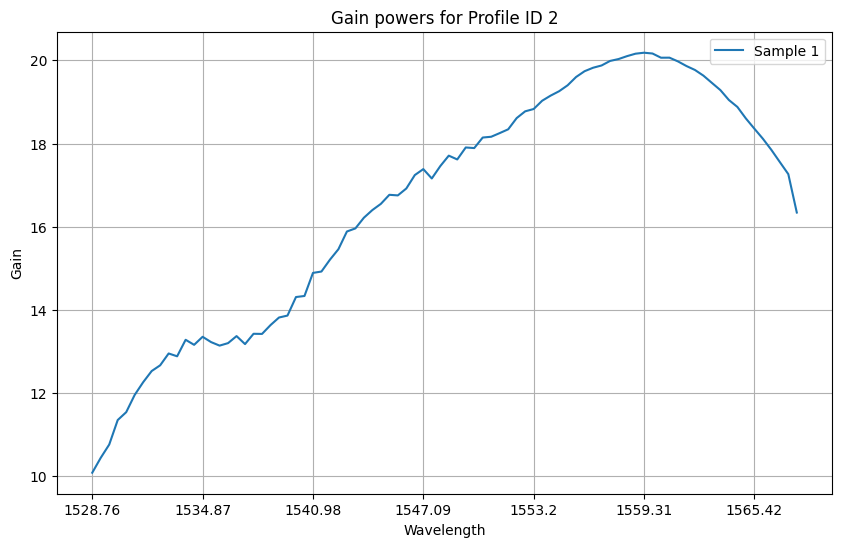

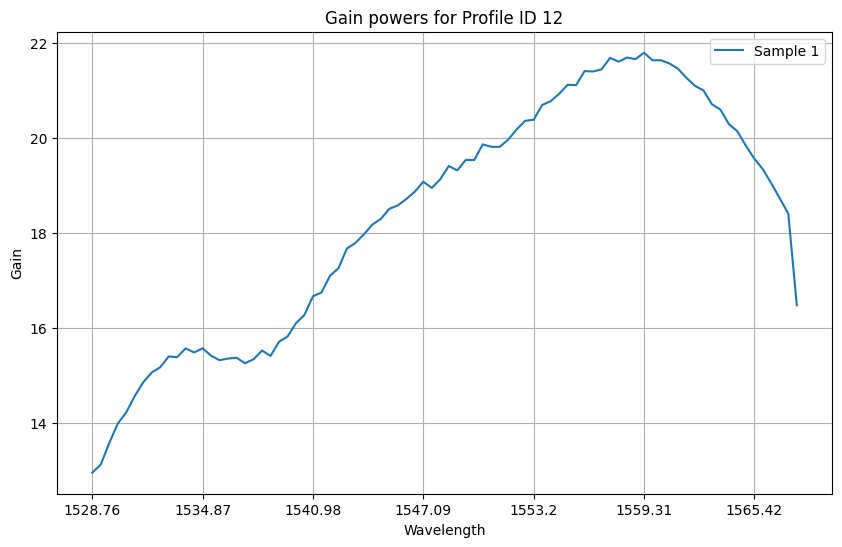

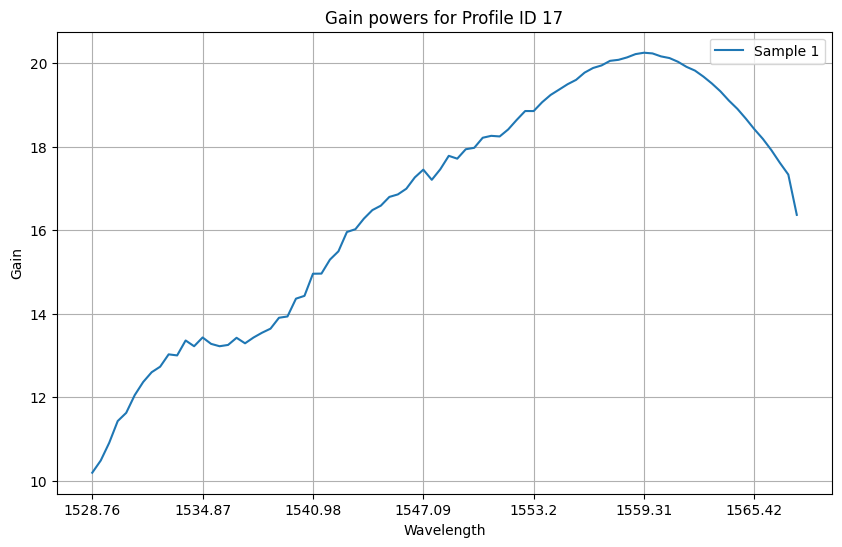

In [ ]:
grouped = df.groupby('profileId')
counter = 0
for name,group in grouped:
    input_powers = group.iloc[:, 1:85].values
    output_powers = group.iloc[:, 85:169].values
    gain_powers = output_powers - input_powers
    counter+=1
    if counter > 3:
        break
    plt.figure(figsize=(10, 6))
    for i in range(gain_powers.shape[0]):
        plt.plot(adjusted_wavelengths, gain_powers[i], label=f'Sample {i+1}')
    plt.xlabel('Wavelength')
    plt.ylabel('Gain')
    plt.title(f'Gain powers for Profile ID {name}')
    plt.legend()
    plt.grid(True)
    plt.xticks(adjusted_wavelengths[::13], [str(wavelength) for wavelength in adjusted_wavelengths[::13]])
    plt.show()


This are the plots of the 9 samples of every unique profile ID.

In [ ]:
new_df = df.copy()

for wavelength in adjusted_wavelengths:
    in_col = 'inat' + str(int(float(wavelength)*100))
    out_col = 'outat' + str(int(float(wavelength)*100))
    gain_col = 'gainat' + str(int(float(wavelength)*100))
    new_df[gain_col] = df[out_col] - df[in_col]

new_df.head()

,profileId,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,inat153111,inat153158,...,gainat156354,gainat156401,gainat156448,gainat156495,gainat156542,gainat156589,gainat156636,gainat156683,gainat152782,gainat152829
0,2,-22.623667,-21.869222,-22.395889,-21.973667,-21.842556,-22.090333,-22.002556,-22.082556,-22.059222,...,18.880222,18.603556,18.358000,18.116889,17.849111,17.555778,17.264667,16.341333,10.086889,10.445778
1,12,-18.899667,-18.327444,-18.788556,-18.273000,-18.388556,-18.515222,-18.568556,-18.613000,-18.860778,...,20.139889,19.835444,19.563222,19.342111,19.043222,18.727667,18.404333,16.477667,12.955444,13.127667
2,17,-22.336667,-21.664444,-22.257778,-21.708889,-21.723333,-21.876667,-21.856667,-21.881111,-21.965556,...,18.910556,18.675000,18.422778,18.191667,17.922778,17.619444,17.336111,16.370556,10.193889,10.486111
3,20,-22.484222,-21.813111,-22.383111,-21.766444,-21.744222,-21.798667,-21.784222,-21.807556,-21.910889,...,18.827556,18.573111,18.326444,18.097556,17.843111,17.525333,17.227556,16.135333,10.103111,10.388667
4,24,-24.583889,-24.216111,-24.555000,-24.117222,-24.230556,-24.323889,-24.397222,-24.371667,-24.382778,...,18.507556,18.272000,18.027556,17.809778,17.564222,17.262000,16.976444,15.907556,9.383111,9.730889


In [ ]:
def CUT(df, n_neighbors, valid_indexes):
    random_index = valid_indexes
    # Select the columns around the random_index
    cut_df = df.iloc[:, random_index - n_neighbors:random_index + n_neighbors + 1].copy()
    #cut_df['profileId'] = df['profileId']



    column_name = df.columns[random_index+84]
    cut_df[column_name] = df[column_name]
    # Determine the middle column index within cut_df
    middle_col_index = n_neighbors

    # Create new column names, with the last column named "output"
    new_column_names = ['n' + str(i) if i != middle_col_index else 'main' for i in range(2 * n_neighbors + 2)]
    new_column_names[-1] = 'output'

    # Apply new column names
    cut_df.columns = new_column_names

    return cut_df

In [ ]:
#cut choices func
cut_wl = random.choice(range(6, 79))
for i in range(1,6):
  display(CUT(df, i,cut_wl))

,n0,main,n2,output
0,-21.649222,-21.737000,-21.778111,-1.914556
1,-25.915222,-25.910778,-25.980778,-4.512000
2,-21.440000,-21.538889,-21.594444,-1.649444
3,-21.333111,-21.376444,-21.373111,-1.577778
4,-21.120556,-21.092778,-21.073889,-1.735222
...,...,...,...,...
1828,-23.513444,-23.592333,-23.669000,-2.848556
1829,-24.115778,-24.102444,-24.076889,-3.141889
1830,-20.028667,-20.107556,-20.120889,-0.920667
1831,-19.215889,-19.280333,-19.334778,-0.657778


,n0,n1,main,n3,n4,output
0,-21.794778,-21.649222,-21.737000,-21.778111,-21.602556,-1.914556
1,-26.220778,-25.915222,-25.910778,-25.980778,-25.698556,-4.512000
2,-21.611111,-21.440000,-21.538889,-21.594444,-21.516667,-1.649444
3,-21.592000,-21.333111,-21.376444,-21.373111,-21.228667,-1.577778
4,-21.401667,-21.120556,-21.092778,-21.073889,-20.978333,-1.735222
...,...,...,...,...,...,...
1828,-23.670111,-23.513444,-23.592333,-23.669000,-23.573444,-2.848556
1829,-24.468000,-24.115778,-24.102444,-24.076889,-23.801333,-3.141889
1830,-20.268667,-20.028667,-20.107556,-20.120889,-20.033111,-0.920667
1831,-19.267000,-19.215889,-19.280333,-19.334778,-19.315889,-0.657778


,n0,n1,n2,main,n4,n5,n6,output
0,-21.838111,-21.794778,-21.649222,-21.737000,-21.778111,-21.602556,-21.394778,-1.914556
1,-26.248556,-26.220778,-25.915222,-25.910778,-25.980778,-25.698556,-25.338556,-4.512000
2,-21.688889,-21.611111,-21.440000,-21.538889,-21.594444,-21.516667,-21.370000,-1.649444
3,-21.750889,-21.592000,-21.333111,-21.376444,-21.373111,-21.228667,-21.017556,-1.577778
4,-21.398333,-21.401667,-21.120556,-21.092778,-21.073889,-20.978333,-20.829444,-1.735222
...,...,...,...,...,...,...,...,...
1828,-23.430111,-23.670111,-23.513444,-23.592333,-23.669000,-23.573444,-23.481222,-2.848556
1829,-24.651333,-24.468000,-24.115778,-24.102444,-24.076889,-23.801333,-23.438000,-3.141889
1830,-20.399778,-20.268667,-20.028667,-20.107556,-20.120889,-20.033111,-19.842000,-0.920667
1831,-19.320333,-19.267000,-19.215889,-19.280333,-19.334778,-19.315889,-19.142556,-0.657778


,n0,n1,n2,n3,main,n5,n6,n7,n8,output
0,-21.884778,-21.838111,-21.794778,-21.649222,-21.737000,-21.778111,-21.602556,-21.394778,-21.649222,-1.914556
1,-26.299667,-26.248556,-26.220778,-25.915222,-25.910778,-25.980778,-25.698556,-25.338556,-25.419667,-4.512000
2,-21.687778,-21.688889,-21.611111,-21.440000,-21.538889,-21.594444,-21.516667,-21.370000,-21.630000,-1.649444
3,-21.837556,-21.750889,-21.592000,-21.333111,-21.376444,-21.373111,-21.228667,-21.017556,-21.196444,-1.577778
4,-21.411667,-21.398333,-21.401667,-21.120556,-21.092778,-21.073889,-20.978333,-20.829444,-21.022778,-1.735222
...,...,...,...,...,...,...,...,...,...,...
1828,-23.357889,-23.430111,-23.670111,-23.513444,-23.592333,-23.669000,-23.573444,-23.481222,-23.870111,-2.848556
1829,-24.832444,-24.651333,-24.468000,-24.115778,-24.102444,-24.076889,-23.801333,-23.438000,-23.576889,-3.141889
1830,-20.557556,-20.399778,-20.268667,-20.028667,-20.107556,-20.120889,-20.033111,-19.842000,-20.106444,-0.920667
1831,-19.381444,-19.320333,-19.267000,-19.215889,-19.280333,-19.334778,-19.315889,-19.142556,-19.449222,-0.657778


,n0,n1,n2,n3,n4,main,n6,n7,n8,n9,n10,output
0,-22.094778,-21.884778,-21.838111,-21.794778,-21.649222,-21.737000,-21.778111,-21.602556,-21.394778,-21.649222,-21.385889,-1.914556
1,-26.406333,-26.299667,-26.248556,-26.220778,-25.915222,-25.910778,-25.980778,-25.698556,-25.338556,-25.419667,-24.977444,-4.512000
2,-21.822222,-21.687778,-21.688889,-21.611111,-21.440000,-21.538889,-21.594444,-21.516667,-21.370000,-21.630000,-21.397778,-1.649444
3,-22.009778,-21.837556,-21.750889,-21.592000,-21.333111,-21.376444,-21.373111,-21.228667,-21.017556,-21.196444,-20.887556,-1.577778
4,-21.581667,-21.411667,-21.398333,-21.401667,-21.120556,-21.092778,-21.073889,-20.978333,-20.829444,-21.022778,-20.690556,-1.735222
...,...,...,...,...,...,...,...,...,...,...,...,...
1828,-23.575667,-23.357889,-23.430111,-23.670111,-23.513444,-23.592333,-23.669000,-23.573444,-23.481222,-23.870111,-23.625667,-2.848556
1829,-25.030222,-24.832444,-24.651333,-24.468000,-24.115778,-24.102444,-24.076889,-23.801333,-23.438000,-23.576889,-23.174667,-3.141889
1830,-20.750889,-20.557556,-20.399778,-20.268667,-20.028667,-20.107556,-20.120889,-20.033111,-19.842000,-20.106444,-19.895333,-0.920667
1831,-19.500333,-19.381444,-19.320333,-19.267000,-19.215889,-19.280333,-19.334778,-19.315889,-19.142556,-19.449222,-19.323667,-0.657778


In [ ]:
def std_data(df, n, cut_wl):

  print(f'\n\nNumber of neighbors = {n}')
  new_df = CUT(df, n,cut_wl)
  x = new_df.drop('output', axis=1).to_numpy()
  y = new_df['output'].to_numpy()

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)  # Fit to the training data and transform it
  X_test = scaler.transform(X_test)


  return X_train, X_test, y_train, y_test


**ALL Models Func**

In [ ]:
def Models (df, model, neighbors, cut_wl):

#Inputs: - df: The whole dataset
#        - model: Trained model that Trained with best parameters
#        - neighbors: Number Of neighbors that model is trained for
#        - cut_wl: the main row

#This function should:
#         * Cut the data based on neighbors and cut window length
#         * Split the data to train and test
#         * Predict the test and print the resualts
#         * Draw plots
#
#Outputs: - Do not have any output


  X_train, X_test, y_train, y_test = std_data(df, neighbors, cut_wl)
  y_pred = model.predict(X_test)
  plt.figure()
  plt.scatter(y_test, y_pred)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs Predicted')
  plt.show()
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error: {mse}')
  print('Number of neighbors =', neighbors)
  #print('Score of the final model: ' + str(model.score(X_test, y_test)))

**Linear Regression**

In [ ]:
def train_linear_regression (X_train, y_train):

#Inputs: - X_train: training set (features)
#        - y_train: training set (ground truth labels)

#This function should:
#         * Perform linear regression hyperparameters optimization via 5-fold crossvalidation
#         * Retrain a linear regression model with MSE
#         * Plot differential between predicted vaslues and real values
#         * Return the trained model
#
#Outputs: - best trained model with best parameters that we found


  n_split_kfold = 5
  skf = KFold(n_splits=n_split_kfold, shuffle=True, random_state=101)
#########
  MAE = 0
  MSE = 0
  RMSE = 0
##########
  for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    lm = LinearRegression()
    t0 = time.time()
    lm.fit(X_train_fold, y_train_fold)
    t1 = time.time()
    predictions = lm.predict(X_test_fold)
    training_time = round(t1 - t0,3)
    MAE += metrics.mean_absolute_error(y_test_fold, predictions)
    MSE += metrics.mean_squared_error(y_test_fold, predictions)
    RMSE += np.sqrt(metrics.mean_squared_error(y_test_fold, predictions))


  MAE = MAE / n_split_kfold
  MSE = MSE / n_split_kfold
  RMSE = RMSE / n_split_kfold
  plt.hist(y_test_fold - predictions, bins = 50)
  plt.show()
  print('Training time [s]: ' + str(training_time))
  print('MAE:', MAE)
  print('MSE:', MSE)
  print('RMSE:', RMSE)

  lm = LinearRegression()
  lm.fit(X_train, y_train)

  return lm, MSE



Number of neighbors = 1


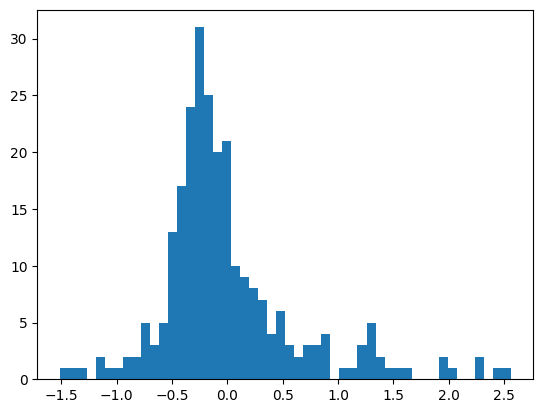

Training time [s]: 0.003
MAE: 0.45607088143447705
MSE: 0.40100995606731027
RMSE: 0.632692664588743


Number of neighbors = 2


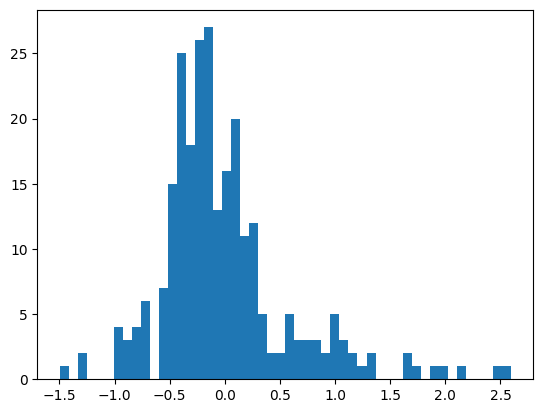

Training time [s]: 0.011
MAE: 0.43520285995459396
MSE: 0.35286853330441276
RMSE: 0.5933960866681389


Number of neighbors = 3


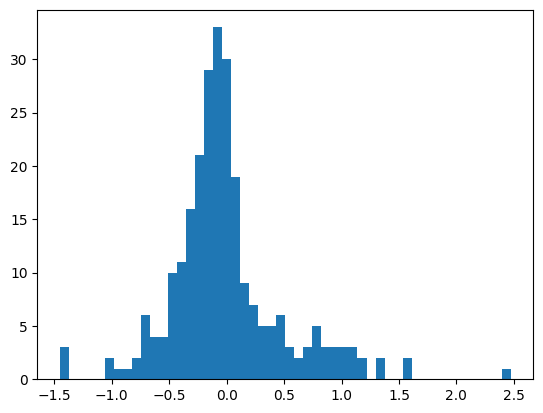

Training time [s]: 0.004
MAE: 0.3442419859060021
MSE: 0.2459408801720334
RMSE: 0.49564115899606537


Number of neighbors = 4


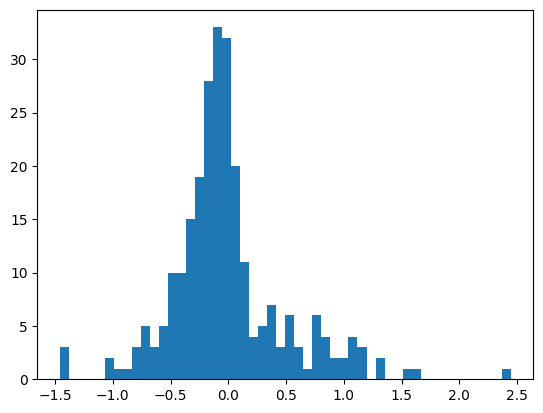

Training time [s]: 0.004
MAE: 0.34603002961606355
MSE: 0.24707211670970838
RMSE: 0.496787501915822


Number of neighbors = 5


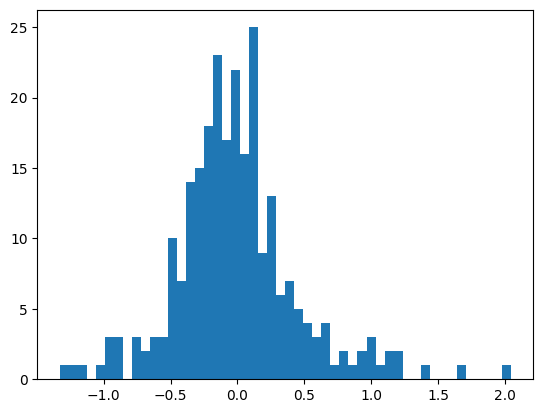

Training time [s]: 0.003
MAE: 0.3312938759572482
MSE: 0.2076381967528696
RMSE: 0.4548448064373766
___________________________

Best number of neighbors is:
Number of neighbor = 5
MSE = 0.2076381967528696


In [ ]:
#calling our train_linear_regression for 5 different neighbors
cut_wl = random.choice(range(14, 77))
#cut_wl = 30
best_neighbors_number = {'mse':np.inf, 'neighbors_number' : 0}
best_lm_model = None
for i in range(1,6):
  #print(f'\n\nNumber of neighbors = {i}')
  X_train, X_test, y_train, y_test = std_data(df, i, cut_wl)

  lm, mse = train_linear_regression(X_train, y_train)

  #if best_neighbors_number['mse'] > mse:
  if abs(best_neighbors_number['mse'] - mse) > 0.001:
    best_lm_model = lm
    best_neighbors_number['mse'] = mse
    best_neighbors_number['neighbors_number'] = i

print(f"___________________________\n\nBest number of neighbors is:\nNumber of neighbor = {best_neighbors_number['neighbors_number']}\nMSE = {best_neighbors_number['mse']}")

In [ ]:
linear_path = f"LinearModel_n{best_neighbors_number['neighbors_number']}_{df.columns[cut_wl]}.pkl"

# Save the model to the desktop
with open(linear_path, 'wb') as file:
    pickle.dump(best_lm_model, file)

**Test the model for test part**



Number of neighbors = 5


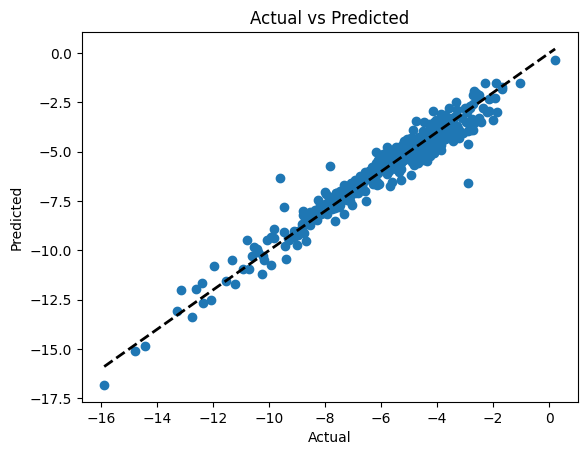

Mean Squared Error: 0.27566806629532176
Number of neighbors = 5


In [ ]:
Models(df, best_lm_model, best_neighbors_number['neighbors_number'], cut_wl)

**Different CUT**

In [ ]:
new_cut_wl = random.choice(range(14, 77))



Number of neighbors = 5


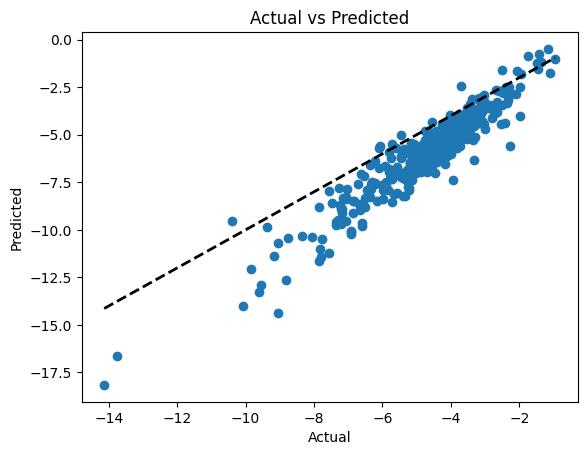

Mean Squared Error: 1.968385854319121
Number of neighbors = 5


In [ ]:
Models(df, best_lm_model, best_neighbors_number['neighbors_number'], new_cut_wl)

**Random Forest**

In [ ]:
def Train_RandomForest(X_train, y_train):
#Inputs: - X_train: training set (features)
#        - y_train: training set (ground truth labels)

#This function should:
#         * Perform random forest with hyperparameters optimization via 5-fold crossvalidation
#         * With nested iteration find the best value
#         * Retrain a random forest model with best hyperparameters using the entire training set (X_train, y_train)
#         * Return the trained model
#
#Outputs: - best trained model with best parameters that we found


    # crossvalidation
    n_split_kfold = 5
    skf = KFold(n_splits=n_split_kfold, shuffle=True, random_state=101)

#########
    #hyperparameters
    best_params = {'n_estimators':0 ,'max_depth':0,'max_features':0, 'score': 0, 'MSE' : np.inf}
    n_estimators = [100, 500, 1000, 1500]
    max_features = ['sqrt', 'log2']
    max_depth = [10,15,20,30]
    scoreplot = np.zeros([len(n_estimators),len(max_depth)])
##########

    t0 = time.time()
    for i, max_f in enumerate(max_features): #loop over feature

        for j, n_es in enumerate(n_estimators): #loop over estimators parameter

           for k, max_d in enumerate(max_depth): #loop over max depth

            print(f'Testing hyperparameters: n_estimators: {n_es}, max_features: {max_f}, , max_depth: {max_d}')

            score =0
            MSE = 0
            for train_index, test_index in skf.split(X_train, y_train):

                X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                model = RandomForestRegressor(n_estimators=n_es, max_features=max_f, max_depth=max_d, random_state=101)
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_test_fold)
                MSE += metrics.mean_squared_error(y_pred, y_test_fold)
                score += model.score(X_test_fold, y_test_fold)

            score = score / n_split_kfold
            MSE = MSE / n_split_kfold
            scoreplot[j,k] = score

            if MSE < best_params['MSE']:
                best_params['MSE'] = MSE
                best_params['score'] = score
                best_params['n_estimators'] = n_es
                best_params['max_depth'] = max_d
                best_params['max_features'] = max_f


##########

    t1 = time.time()
    crossval_time = round(t1 - t0, 3)
    print('Crossval time [s]: ' + str(crossval_time))
    print('Best hyperparams during crossval: ' + str(best_params))

    print(scoreplot)

    for p in list(range(scoreplot.shape[1])):
        plt.plot(n_estimators,scoreplot[:, p], label=f'Max Depth={max_depth[p]}')

    plt.xlabel("Number of estimators")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

    training_time = 0 #F: here you will store final training time
    finalscore = 0 #F: here you will store final accuracy

    best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'], max_depth=best_params['max_depth'], random_state=101)
    t0 = time.time()
    best_rf_model.fit(X_train, y_train)
    t1 = time.time()

    yhat = best_rf_model.predict(X_train)
    mse = mean_squared_error(y_train, yhat)
    print('mse:',mse)

    training_time = round(t1 - t0,3)
    finalscore = best_rf_model.score(X_train, y_train)
    print('Score of the final model: ' + str(finalscore))
    print('Training time [s]: ' + str(training_time))
    return best_rf_model, best_params



Number of neighbors = 1
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 30
Testing hy

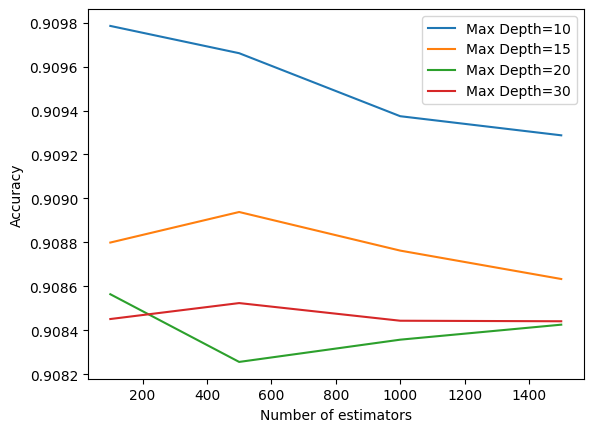

mse: 0.11585273899542403
Score of the final model: 0.9734127277457407
Training time [s]: 0.246


Number of neighbors = 2
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth:

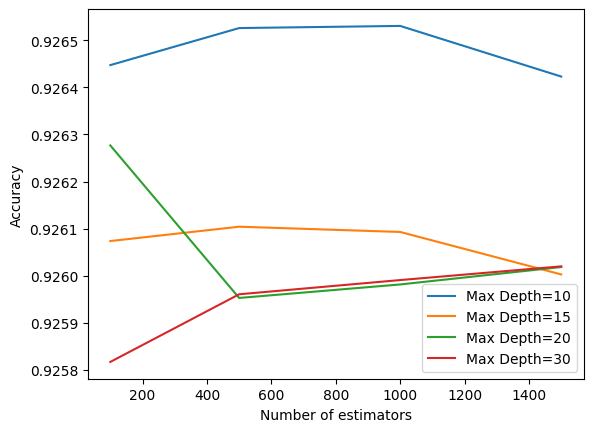

mse: 0.07794722096264324
Score of the final model: 0.9821117394101614
Training time [s]: 1.866


Number of neighbors = 3
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth:

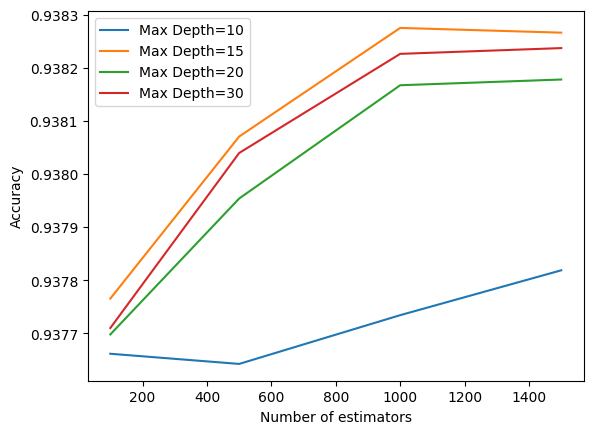

mse: 0.03737770356181134
Score of the final model: 0.9914221175135434
Training time [s]: 7.502


Number of neighbors = 4
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth:

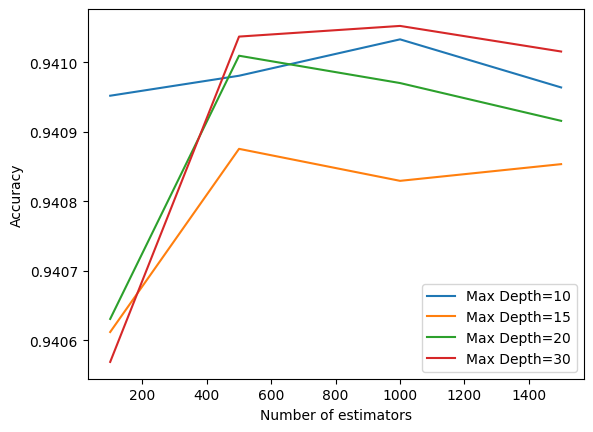

mse: 0.0346462330830538
Score of the final model: 0.9920489680300087
Training time [s]: 4.775


Number of neighbors = 5
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 100, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 20
Testing hyperparameters: n_estimators: 500, max_features: sqrt, , max_depth: 30
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 10
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 15
Testing hyperparameters: n_estimators: 1000, max_features: sqrt, , max_depth: 

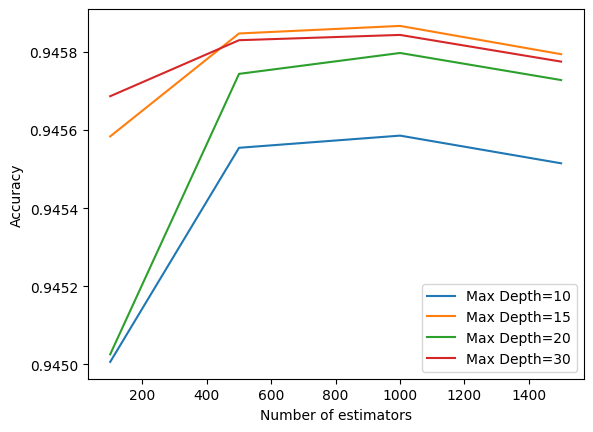

mse: 0.03247805720522759
Score of the final model: 0.99254654696391
Training time [s]: 5.405
___________________________

Best number of neighbors is:
Number of neighbor = 5
Score = 0.9458667171741164


In [ ]:
#calling our Train_RandomForest for all 5 neighbors
best_model_parameteres = {'n_estimators': 0, 'max_depth': 0, 'max_features': None, 'mse': np.inf, 'n_neighbors':0}
best_model_rf = None
for i in range(1,6):

  X_train, X_test, y_train, y_test = std_data(df, i, cut_wl)

  rf_model, best_params_rf = Train_RandomForest(X_train, y_train)
  #if best_params_rf['score'] > best_model_parameteres['score']:
  #if abs(best_params_rf['score'] - best_model_parameteres['score']) > 0.001:
  if abs(best_model_parameteres['mse'] - best_params_rf['MSE']) > 0.001:
    best_model_parameteres.update(best_params_rf)
    best_model_parameteres['n_neighbors'] = i
    best_model_rf = rf_model

print(f"___________________________\n\nBest number of neighbors is:\nNumber of neighbor = {best_model_parameteres['n_neighbors']}\nScore = {best_model_parameteres['score']}")

In [ ]:
rf_path = f"RandomForest_n{best_model_parameteres['n_neighbors']}_{df.columns[cut_wl]}.pkl"

# Save the model to the desktop
with open(rf_path, 'wb') as file:
    pickle.dump(best_model_rf, file)

**Test the model for test part**



Number of neighbors = 5


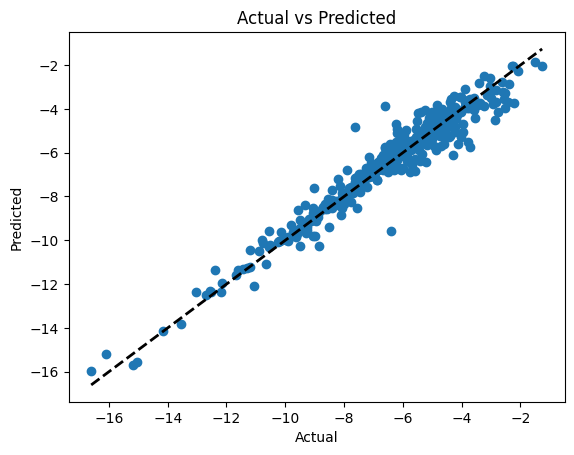

Mean Squared Error: 0.253115510481942
Number of neighbors = 5


In [ ]:
Models(df, best_model_rf, best_model_parameteres['n_neighbors'], cut_wl)



Number of neighbors = 5


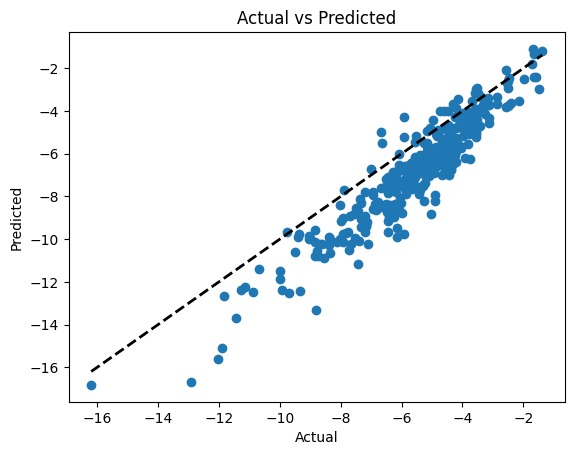

Mean Squared Error: 2.246691733288731
Number of neighbors = 5


In [ ]:
Models(df, best_model_rf, best_model_parameteres['n_neighbors'], new_cut_wl)

**Neural Network**

In [ ]:
def create_model(input_dim, activation='relu', optimizer='adam', layers = [64, 32, 16]):

#Inputs: - input_dim: get the input dimention
#        - activation: the activation that we use for creating model
#        - optimizer: the optimizer that we use for creating model
#        - layers: the layers that we use for creating model

#This function should:
#         * get the parameters and then create a deep neural network model
#         * return the model
#Outputs: - The model that created by those parameters

    model = Sequential()
    model.add(Dense(layers[0], input_dim=input_dim, activation=activation))
    for layer_size in layers[1:]:
        model.add(Dense(layer_size, activation=activation))
    model.add(Dense(1))
    if optimizer.lower() == 'adam':
        opt = Adam()
    else:
        opt = SGD()
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

In [ ]:
def train_NN(X_train, y_train):

#Inputs: - X_train: training set (features)
#        - y_train: training set (ground truth labels)

#This function should:
#         * Perform deep neural network with hyperparameters optimization via 5-fold crossvalidation
#         * With nested iteration find the best parameter
#         * Retrain a deep neural network model with best hyperparameters using the entire training set (X_train, y_train)
#         * Return the trained model
#
#Outputs: - best trained model with best parameters that we found

    n_split_kfold = 5
    skf = KFold(n_splits=n_split_kfold, shuffle=True, random_state=101)

    best_params = {'activation': None, 'optimizer': None, 'layers': None, 'mse': np.inf, 'loss_curve': None}

    activations = ['relu', 'sigmoid']
    optimizers = ['adam', 'SGD']
    layers = [[15,10,5], [32,16,8]]

    mseplot = np.zeros((len(activations), len(optimizers), len(layers)))
    best_loss_curve = None

    t0 = time.time()

    for i, activation in enumerate(activations):
        for j, optimizer in enumerate(optimizers):
            for k, layer in enumerate(layers):
                print(f'Testing hyperparameters: activation: {activation}, optimizer: {optimizer}, layers: {layer}')
                mse = 0

                for train_index, test_index in skf.split(X_train, y_train):
                    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                    model = create_model(X_train_fold.shape[1], activation, optimizer, layer)
                    history = model.fit(X_train_fold, y_train_fold, epochs=80, batch_size=32, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], validation_data=(X_test_fold, y_test_fold))
                    y_pred = model.predict(X_test_fold)
                    mse += mean_squared_error(y_test_fold, y_pred)

                mse /= n_split_kfold
                mseplot[i, j, k] = mse

                if mse < best_params['mse']:
                    best_params['mse'] = mse
                    best_params['activation'] = activation
                    best_params['optimizer'] = optimizer
                    best_params['layers'] = layer
                    best_params['loss_curve'] = history.history['loss']

    t1 = time.time()
    crossval_time = round(t1 - t0, 3)
    print('Crossval time [s]: ' + str(crossval_time))
    print('Best hyperparams during crossval: ' + str(best_params))

    print(mseplot)

    training_time = 0
    finalmse = 0

    best_model = create_model(X_train.shape[1], activation=best_params['activation'], optimizer=best_params['optimizer'], layers=best_params['layers'])
    t0 = time.time()
    history = best_model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)
    t1 = time.time()

    plt.plot(best_params['loss_curve'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    training_time = round(t1 - t0, 3)
    print('Training time [s]: ' + str(training_time))

    loss = history.history['loss'][-1]
    print('Loss:', loss)

    yhat = best_model.predict(X_train)
    mse = mean_squared_error(y_train, yhat)
    print('mse:', mse)

    r2 = best_model.evaluate(X_train, y_train, verbose=0)
    print('r2:', str(r2))
    print('total # of iteration:', best_model.optimizer.iterations.numpy())
    print('Train duration:', training_time)

    best_model.summary()

    return best_model, best_params



Number of neighbors = 1
Testing hyperparameters: activation: relu, optimizer: adam, layers: [15, 10, 5]
8/8 [==============================] - 0s 3ms/step
Testing hyperparameters: activation: relu, optimizer: adam, layers: [32, 16, 8]
8/8 [==============================] - 0s 2ms/step
Testing hyperparameters: activation: relu, optimizer: SGD, layers: [15, 10, 5]
8/8 [==============================] - 0s 2ms/step
Testing hyperparameters: activation: relu, optimizer: SGD, layers: [32, 16, 8]
8/8 [==============================] - 0s 3ms/step
Testing hyperparameters: activation: sigmoid, optimizer: adam, layers: [15, 10, 5]
8/8 [==============================] - 0s 3ms/step
Testing hyperparameters: activation: sigmoid, optimizer: adam, layers: [32, 16, 8]
8/8 [==============================] - 0s 2ms/step
Testing hyperparameters: activation: sigmoid, optimizer: SGD, layers: [15, 10, 5]
8/8 [==============================] - 0s 2ms/step
Testing hyperparameters: activation: sigmoid, optim

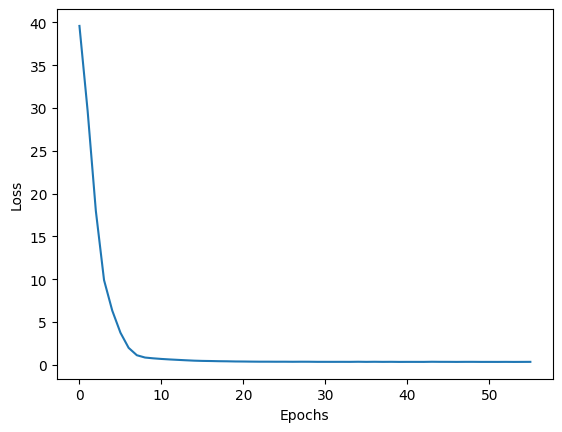

Training time [s]: 11.169
Loss: 0.36316126585006714
41/41 [==============================] - 0s 1ms/step
mse: 0.35046167321850963
r2: 0.3504616618156433
total # of iteration: 3280
Train duration: 11.169
Model: "sequential_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_550 (Dense)           (None, 32)                128       
                                                                 
 dense_551 (Dense)           (None, 16)                528       
                                                                 
 dense_552 (Dense)           (None, 8)                 136       
                                                                 
 dense_553 (Dense)           (None, 1)                 9         
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________

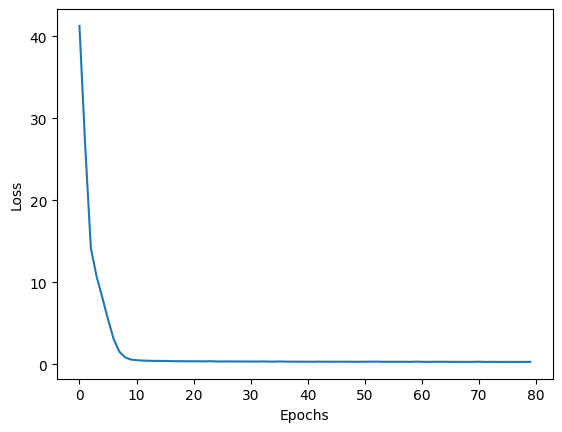

Training time [s]: 7.572
Loss: 0.29500243067741394
41/41 [==============================] - 0s 1ms/step
mse: 0.29075926873537583
r2: 0.29075929522514343
total # of iteration: 3280
Train duration: 7.572
Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_714 (Dense)           (None, 32)                192       
                                                                 
 dense_715 (Dense)           (None, 16)                528       
                                                                 
 dense_716 (Dense)           (None, 8)                 136       
                                                                 
 dense_717 (Dense)           (None, 1)                 9         
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

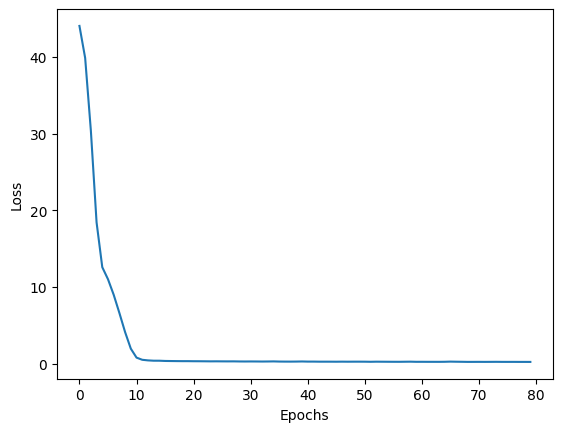

Training time [s]: 6.209
Loss: 0.22434544563293457
41/41 [==============================] - 0s 1ms/step
mse: 0.22212333869672815
r2: 0.22212329506874084
total # of iteration: 3280
Train duration: 6.209
Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_878 (Dense)           (None, 32)                256       
                                                                 
 dense_879 (Dense)           (None, 16)                528       
                                                                 
 dense_880 (Dense)           (None, 8)                 136       
                                                                 
 dense_881 (Dense)           (None, 1)                 9         
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

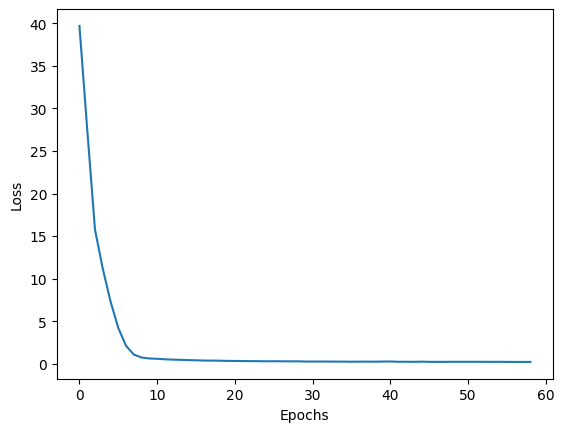

Training time [s]: 11.616
Loss: 0.22523771226406097
41/41 [==============================] - 0s 2ms/step
mse: 0.21462079011123725
r2: 0.21462082862854004
total # of iteration: 3280
Train duration: 11.616
Model: "sequential_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1042 (Dense)          (None, 32)                320       
                                                                 
 dense_1043 (Dense)          (None, 16)                528       
                                                                 
 dense_1044 (Dense)          (None, 8)                 136       
                                                                 
 dense_1045 (Dense)          (None, 1)                 9         
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
________________

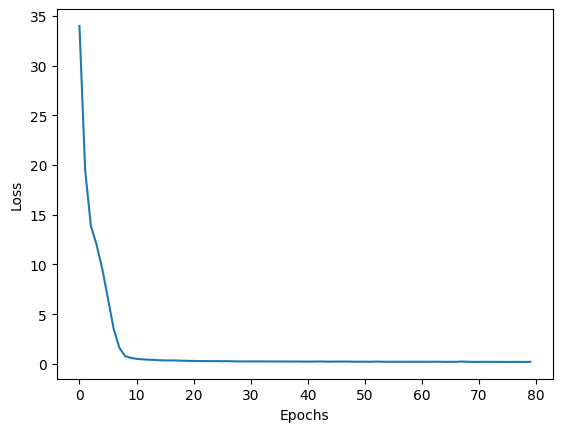

Training time [s]: 9.77
Loss: 0.21200604736804962
41/41 [==============================] - 0s 2ms/step
mse: 0.18278864798244793
r2: 0.18278862535953522
total # of iteration: 3280
Train duration: 9.77
Model: "sequential_296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1206 (Dense)          (None, 32)                384       
                                                                 
 dense_1207 (Dense)          (None, 16)                528       
                                                                 
 dense_1208 (Dense)          (None, 8)                 136       
                                                                 
 dense_1209 (Dense)          (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
#calling the train_NN for 5 neighbors
best_model_parameteres = {'n_neighbors':0, 'mse':np.inf}
all_plots = {'Loss_curve':[], 'neighbors':[], 'MSE' : [], 'layers': []}
best_model_NN = None

for n in range(1,6):

  X_train, X_test, y_train, y_test = std_data(df, n, cut_wl)
  NN_model, best_params_NN = train_NN(X_train, y_train)

  all_plots['Loss_curve'].append(best_params_NN['loss_curve'])
  all_plots['neighbors'].append(n)
  all_plots['MSE'].append(best_params_NN['mse'])
  all_plots['layers'].append(best_params_NN['layers'])
  if abs(best_params_NN['mse'] - best_model_parameteres['mse']) > 0.001:
    best_model_parameteres.update(best_params_NN)
    best_model_parameteres['n_neighbors'] = n
    best_model_NN = NN_model
print(f"Best number of neighbors is:\nNumber of neighbor = {best_model_parameteres['n_neighbors']}\nmse = {best_model_parameteres['mse']}")

In [ ]:
DNN_path = f"DeepNeuralNetwork_n{best_model_parameteres['n_neighbors']}_{df.columns[cut_wl]}.pkl"

# Save the model to the desktop
with open(DNN_path, 'wb') as file:
    pickle.dump(best_model_NN, file)

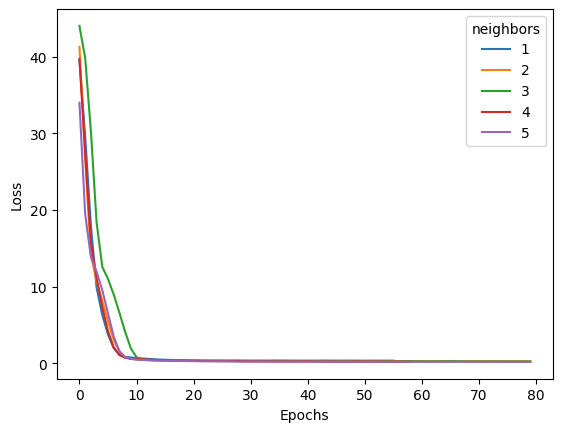

MSE = 0.3762904397615884 for 1 neighbors
MSE = 0.320914143087897 for 2 neighbors
MSE = 0.26210960729123145 for 3 neighbors
MSE = 0.26611650289842287 for 4 neighbors
MSE = 0.2322814245529478 for 5 neighbors


In [ ]:
#ploting all loss for the best parameters for each neighbor
for p in all_plots['Loss_curve']:
  plt.plot(p)
  plt.legend(all_plots['neighbors'], title='neighbors')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
plt.show()
for i in range(0,len(all_plots['MSE'])):
  print(f"MSE = {all_plots['MSE'][i]} for {all_plots['neighbors'][i]} neighbors")

**Test the model for test part**



Number of neighbors = 5
18/18 [==============================] - 0s 2ms/step


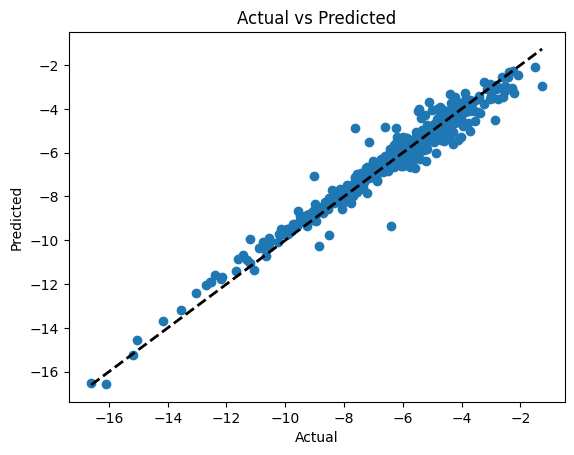

Mean Squared Error: 0.2196212433588219
Number of neighbors = 5


In [ ]:
Models(df, best_model_NN, best_model_parameteres['n_neighbors'], cut_wl)

**New CUT Test**



Number of neighbors = 5
18/18 [==============================] - 0s 3ms/step


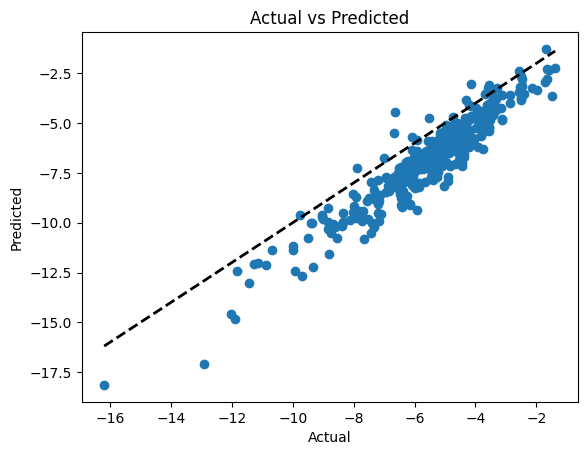

Mean Squared Error: 2.079757427026796
Number of neighbors = 5


In [ ]:
Models(df, best_model_NN, best_model_parameteres['n_neighbors'], new_cut_wl)

**Transfer Learning:**



Number of neighbors = 5


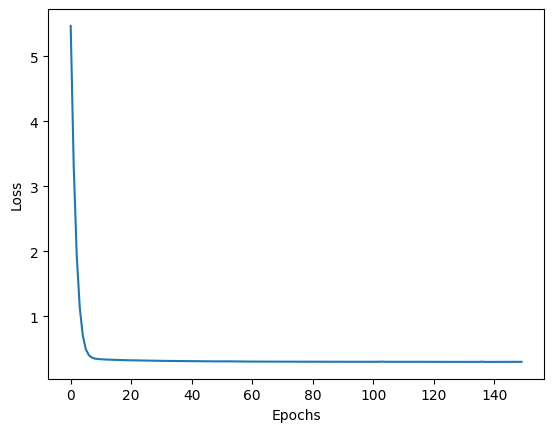

Training time [s]: 21.038
Loss: 0.29833701252937317
41/41 [==============================] - 0s 2ms/step
mse: 0.2967797517870778
r2: 0.29677972197532654
total # of iteration: 6150
Model: "sequential_302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1206 (Dense)          (None, 32)                384       
                                                                 
 dense_1207 (Dense)          (None, 16)                528       
                                                                 
 dense_1208 (Dense)          (None, 8)                 136       
                                                                 
 dense_1215 (Dense)          (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 1048 (4.09 KB)
_____________________________________

In [ ]:
# Load the pre-trained model
presaved_model_path = '/content/DeepNeuralNetwork_n5_in1541.45.pkl'

# Open the file in read-binary mode and load the model
with open(presaved_model_path, 'rb') as file:
    pretrained_model = pickle.load(file)


# Freeze all layers except the last one
for layer in pretrained_model.layers[:-1]:
    layer.trainable = False

# Modify the last layer to match the output for the new dataset if necessary
last_layer_output_dim = pretrained_model.layers[-1].output_shape[-1]

# Create a new model and copy the layers
new_model = Sequential()
for layer in pretrained_model.layers[:-1]:
    new_model.add(layer)
# Add a new trainable output layer
new_model.add(Dense(last_layer_output_dim))


if best_params_NN['optimizer'].lower() == 'adam':
  opt = Adam()
else:
  opt = SGD()


new_model.compile(optimizer=opt, loss='mean_squared_error')


X_train, X_test, y_train, y_test = std_data(df, best_model_parameteres['n_neighbors'], new_cut_wl)


training_time = 0
t0 = time.time()
history = new_model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
t1 = time.time()

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

training_time = round(t1 - t0, 3)
print('Training time [s]: ' + str(training_time))

loss = history.history['loss'][-1]
print('Loss:', loss)

yhat = new_model.predict(X_train)
mse = mean_squared_error(y_train, yhat)
print('mse:', mse)

r2 = new_model.evaluate(X_train, y_train, verbose=0)
print('r2:', str(r2))
print('total # of iteration:', new_model.optimizer.iterations.numpy())

# Summary of the new model to check layer freezing
new_model.summary()


In [ ]:
tl_path = f"fine_tuned_model_n{best_model_parameteres['n_neighbors']}_{df.columns[new_cut_wl]}.pkl"

# Save the model to the desktop
with open(tl_path, 'wb') as file:
    pickle.dump(new_model, file)



Number of neighbors = 5
18/18 [==============================] - 0s 3ms/step


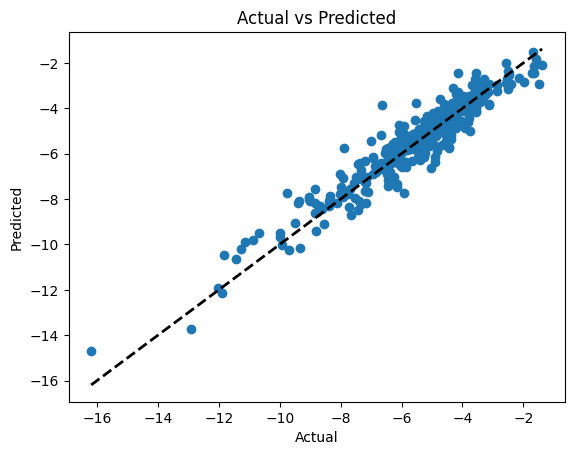

Mean Squared Error: 0.2868878550881051
Number of neighbors = 5


In [ ]:
Models(df, new_model, best_model_parameteres['n_neighbors'], new_cut_wl)